# Superstore Marketing Campaign

## About the dataset

__Background__: A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only  499 which is 999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

__Objective__: The superstore aims to predict the likelihood of the customer giving a positive response about the marketing campaign and intends to identify various factors influencing customer responses.

## Workflow

* Importing Libraries
* Load the dataset
* Exploratory Data Analysis (EDA)
* Visualization
* Modelling and Evaluation
* Summary and Conclusion
* Use for the other Domains

### Importing Libraries

In [5]:
#Importing Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [6]:
#Loading the Dataset
df = pd.read_csv(r"C:\Users\SIMRAN TALWAR\superstore_data.csv")

### Exploratory Data Analysis (EDA)

In [7]:
#Exploring the dataset
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [8]:
df.shape
#Dataset have 2240 rows and 22 columns

(2240, 22)

In [9]:
#Name of the columns
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [10]:
#Gathering information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
#Checking for duplicate values
df.duplicated().sum()

0

In [12]:
#Checking for null values
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

__Insight__: We have 24 nulls values in the 'Income' column.

In [13]:
#Treating Null Values
df["Income"] = df["Income"].fillna(df["Income"].mean())

In [14]:
#Let's check again for null values
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

We have treated all the null values.

In [15]:
#Describing the dataset for the numerical columns
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


### Visualization

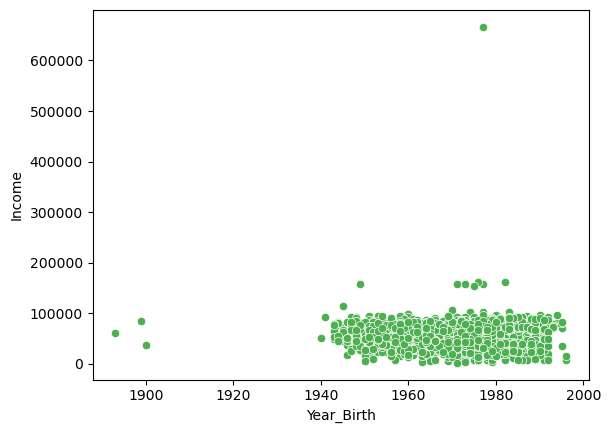

In [16]:
#Visualizing the relationship between the "Year_Birth" and "Income" columns in the DataFrame
fig, ax = plt.subplots()

sns.scatterplot(df, x='Year_Birth', y='Income', ax=ax, color='#4CAF50')

plt.show()

__Insight__: We can see there are some outliers that are present in the Income and Year_Birth column.

In [17]:
#Let's check for the Outliers
df[df.Year_Birth <= 1900]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/2014,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899,PhD,Together,83532.0,0,0,9/26/2013,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1


__Insight__: There is a significant time gap between 1900 and 1940 in the 'Year_Birth' column with no values. Additionally, there are only 3 customers who were born before 1901. These values are undoubtedly outliers, and there is a possibility that a data entry error occurred in these cases.

Additionally,

1. There is one value in the 'Income' column that deviates significantly from the expected pattern.

2. These values in both columns must be treated to prevent them from negatively influencing our insights and more importantly, our model

In [18]:
#Treating the outliers by dropping the people born before or in 1900 and people having income greater than 300000
df.drop(df.index[df.Year_Birth <= 1900], inplace=True)
df.drop(df.index[df.Income > 300000], inplace=True)

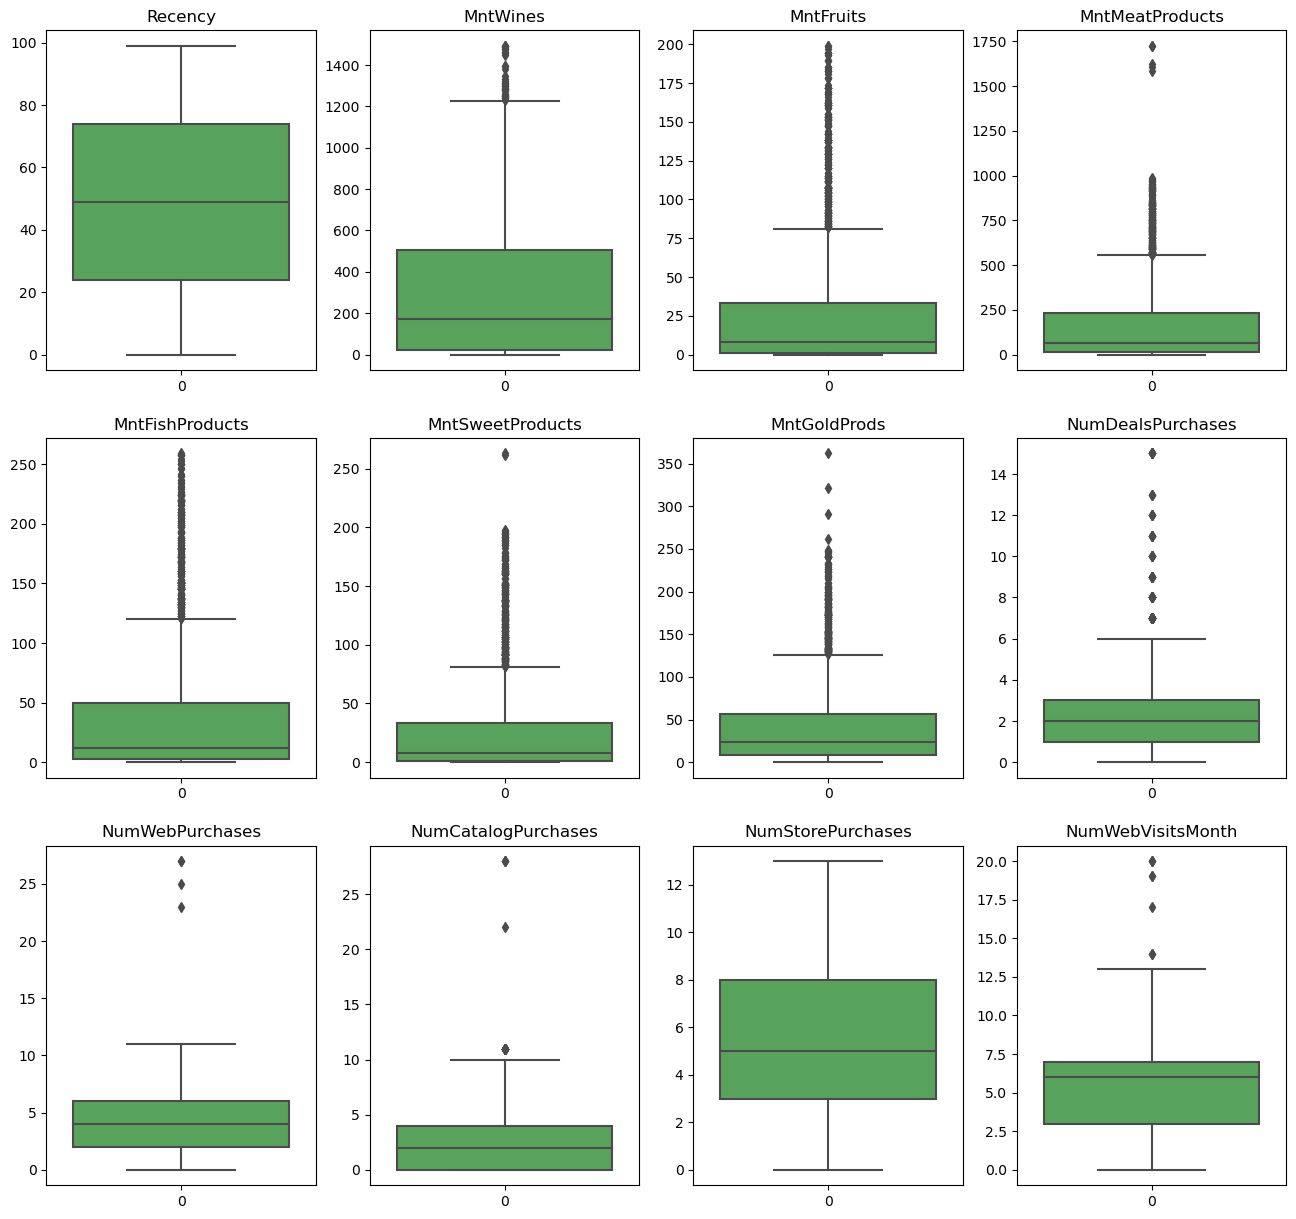

In [19]:
#Creating a grid of boxplots
list_boxplots = ['Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))


cont = 0  # Initialize a variable 'cont' to keep track of the index in the list_boxplots
for i in range(3):  # Outer loop iterating over rows (assuming there are 3 rows)
    for j in range(4):  # Inner loop iterating over columns (assuming there are 4 columns)
        sns.boxplot(df[list_boxplots[cont]], ax=ax[i][j], color='#4CAF50')
        # Create a boxplot for the data in the DataFrame column specified by list_boxplots[cont]
        # Use the specified subplot 'ax[i][j]' to draw the boxplot
        # Set the boxplot color to '#4CAF50' (a shade of green)

        ax[i][j].set_title(list_boxplots[cont])  # Set the title of the subplot to the column name
        cont = cont + 1  # Increment the index to move to the next column in list_boxplots

* The above graph generates a 3x4 grid of boxplots, each representing the distribution of values for a specific column from the DataFrame (df)
* The selected columns are specified in the list_boxplots
* This visualization can be useful for understanding the spread, central tendency, and potential outliers in the data for each selected variable


__Insight__: There are outliers present in the following columns: Meat Products, Sweet Products, Gold Products.

In [20]:
#Treating Outliers
df.drop(df.index[df.MntMeatProducts > 1200], inplace=True)
df.drop(df.index[df.MntSweetProducts > 240], inplace=True)
df.drop(df.index[df.MntGoldProds > 270], inplace=True)

In [21]:
#rechecking the number of rows and columns 
df.shape

(2227, 22)

__Insight__: Thirteen samples were dropped compared to the origianl dataset.

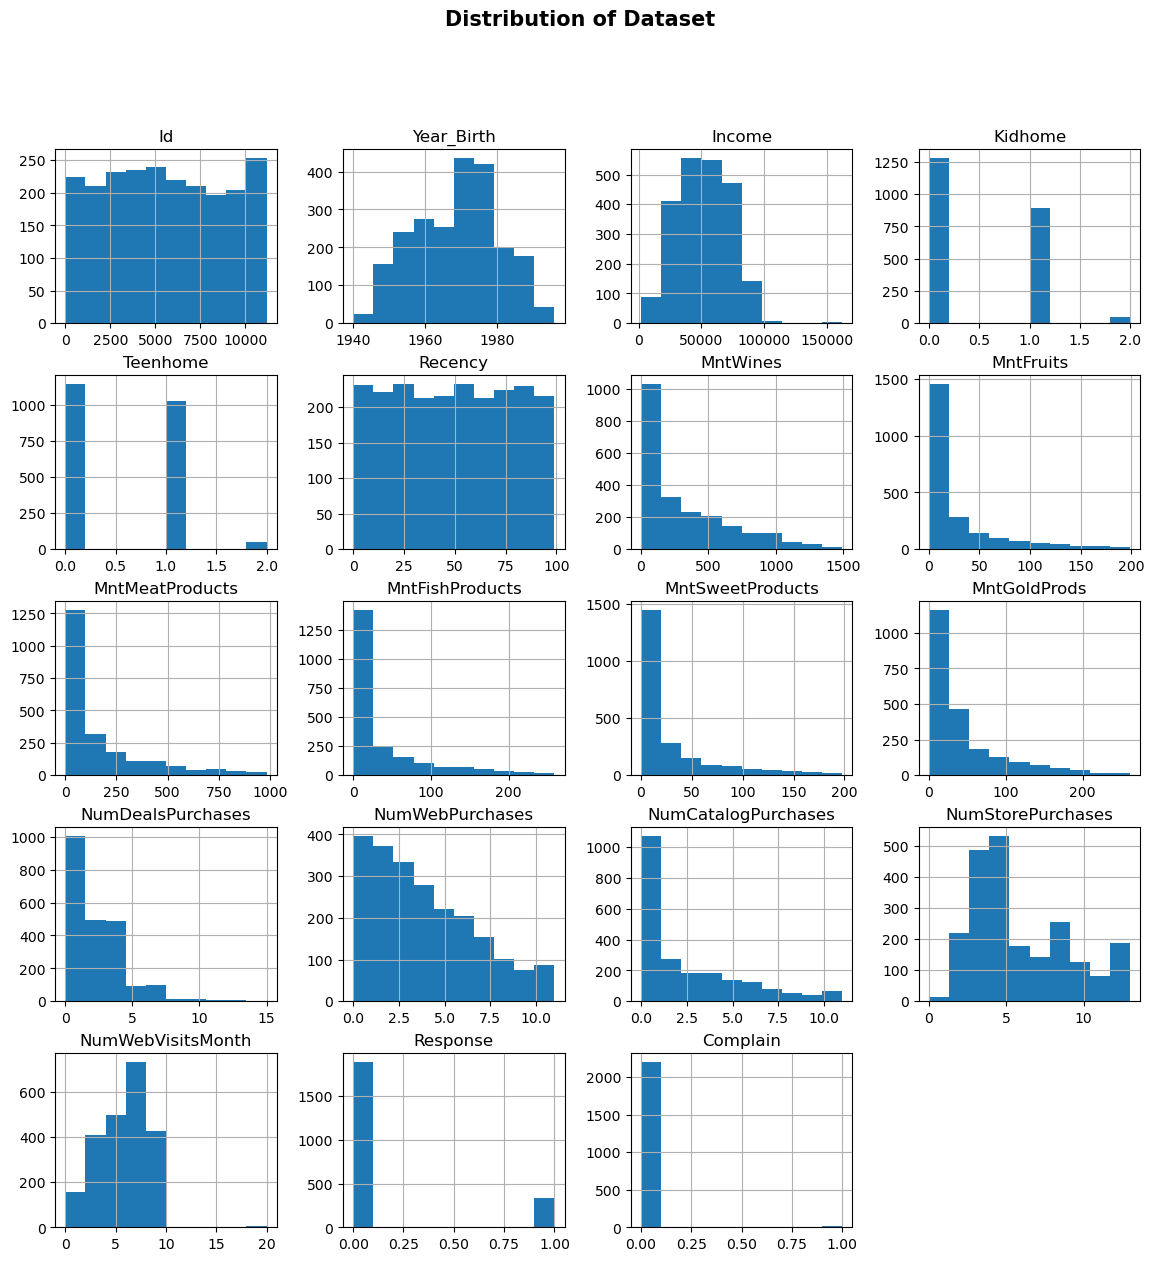

In [22]:
#Creating a histogram to check for patterns
df.hist(figsize=(14,14))
plt.suptitle("Distribution of Dataset",fontweight="bold", fontsize=15)

plt.show()

__Insight__: Most of the data is skewed.

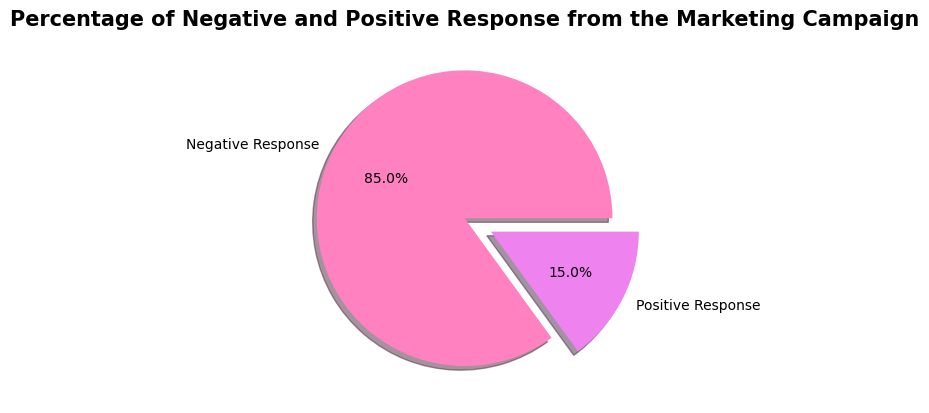

In [23]:
# Finding the percentage of the negative and positive responses

fig, ax = plt.subplots()

ax.pie(
    df.Response.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF81C0', '#EE82EE']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign', fontsize=15, fontweight="bold" )

plt.show()

__Insight__: Our dataset suffers from Imbalanced classes with only 15% of customers providing a positive response, before modeling, we need balance the data to avoid favoring the majority class.

In [24]:
#Fixing the class imbalanced situation
response_date = df.groupby('Dt_Customer')['Response'].mean().reset_index()
response_date['Dt_Customer'] = response_date.Dt_Customer.astype(str)

In [25]:
import datetime as dt

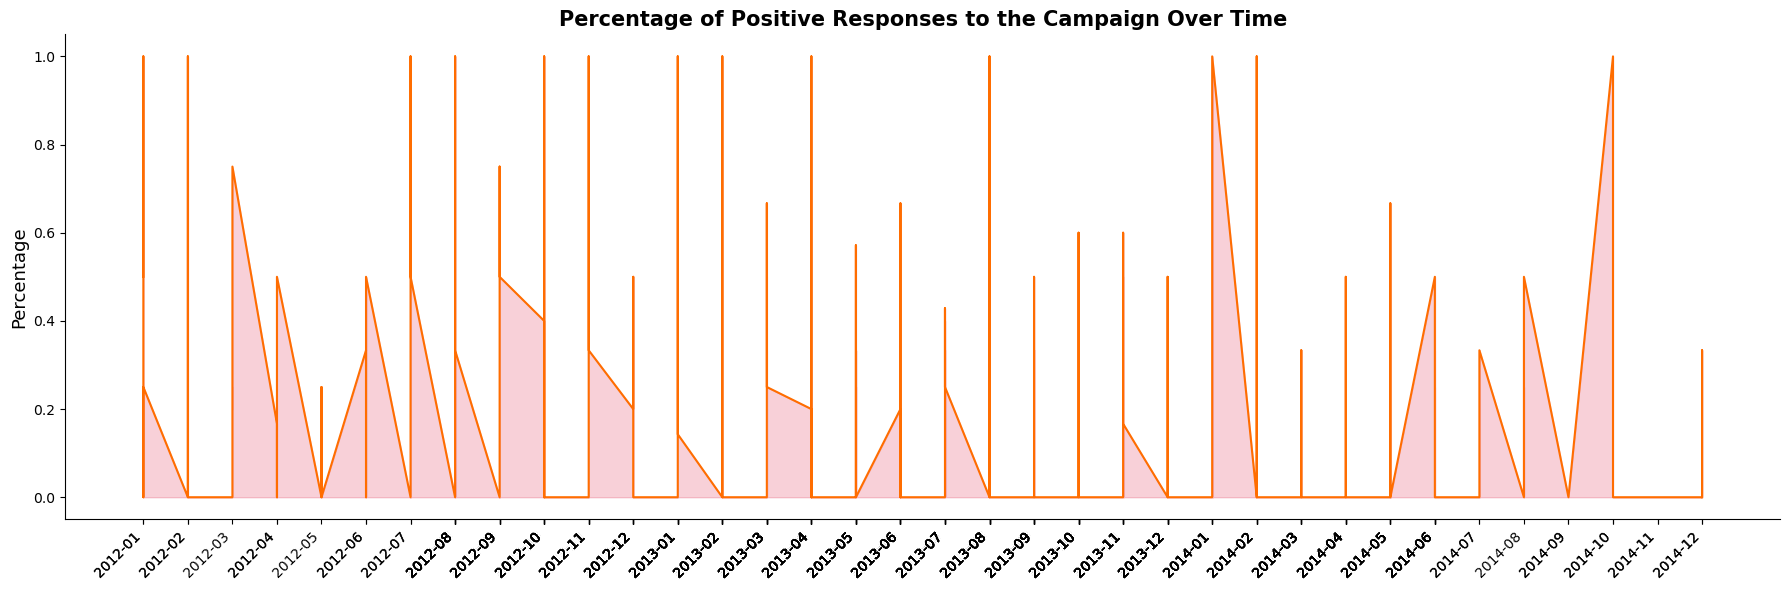

In [26]:
# Assuming 'Dt_Customer' is a string column, convert it to datetime
response_date['Dt_Customer'] = pd.to_datetime(response_date['Dt_Customer'])

# Create a new column for YearMonth
response_date['YearMonth'] = response_date['Dt_Customer'].dt.to_period('M')

# Convert 'YearMonth' to string for plotting
response_date['YearMonth_str'] = response_date['YearMonth'].astype(str)

# Sort the DataFrame by the new column
response_date = response_date.sort_values('YearMonth')

# Create the plot to get the percentage of positives responses to the campaign over time
fig, ax = plt.subplots(figsize=(18, 6))  # Increased figure size

plt.plot(response_date['YearMonth_str'], response_date['Response'], color='#ff6d00')  # Use YearMonth_str for x-axis
plt.fill_between(response_date['YearMonth_str'], response_date['Response'], color='#DC143C', alpha=0.2)

# Adjust the x-axis tick positions and labels
ax.set_xticks(response_date['YearMonth_str'][::3])  # Show every 3rd label for better readability
ax.set_xticklabels(response_date['YearMonth_str'][::3], rotation=45, ha='right')  # Rotate and adjust font size of x-axis labels

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Percentage of Positive Responses to the Campaign Over Time', fontsize=15, fontweight="bold")
ax.set_ylabel('Percentage', fontsize=13)

fig.tight_layout()

plt.show()


__Insight__: We observe that long-standing customers are more likely than new customers to provide a positive response to the campaign.

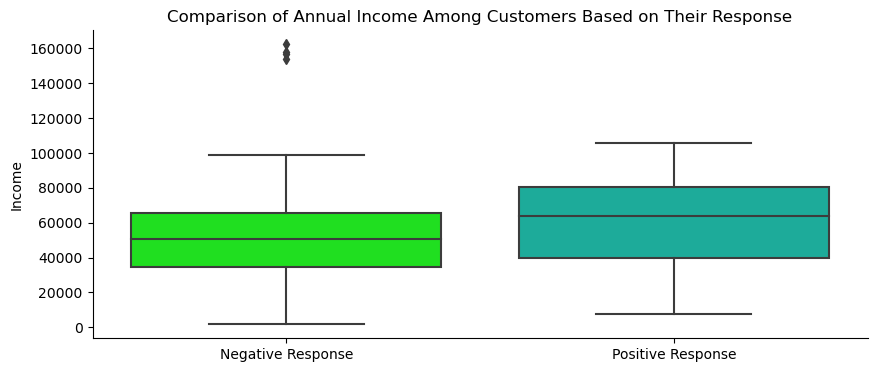

In [27]:
#Comparison of Income and Responses

fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(df, x='Response', y='Income', ax=ax, palette=['#00FF00', '#06C2AC'])

ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Comparison of Annual Income Among Customers Based on Their Response', fontsize=12)

ax.set_xticklabels(['Negative Response', 'Positive Response'])
ax.set_xlabel('')

plt.show()

__Insight__: Customers with a positive response tend to possess a greater annual income.

In [28]:
#Selecting categorical columns
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

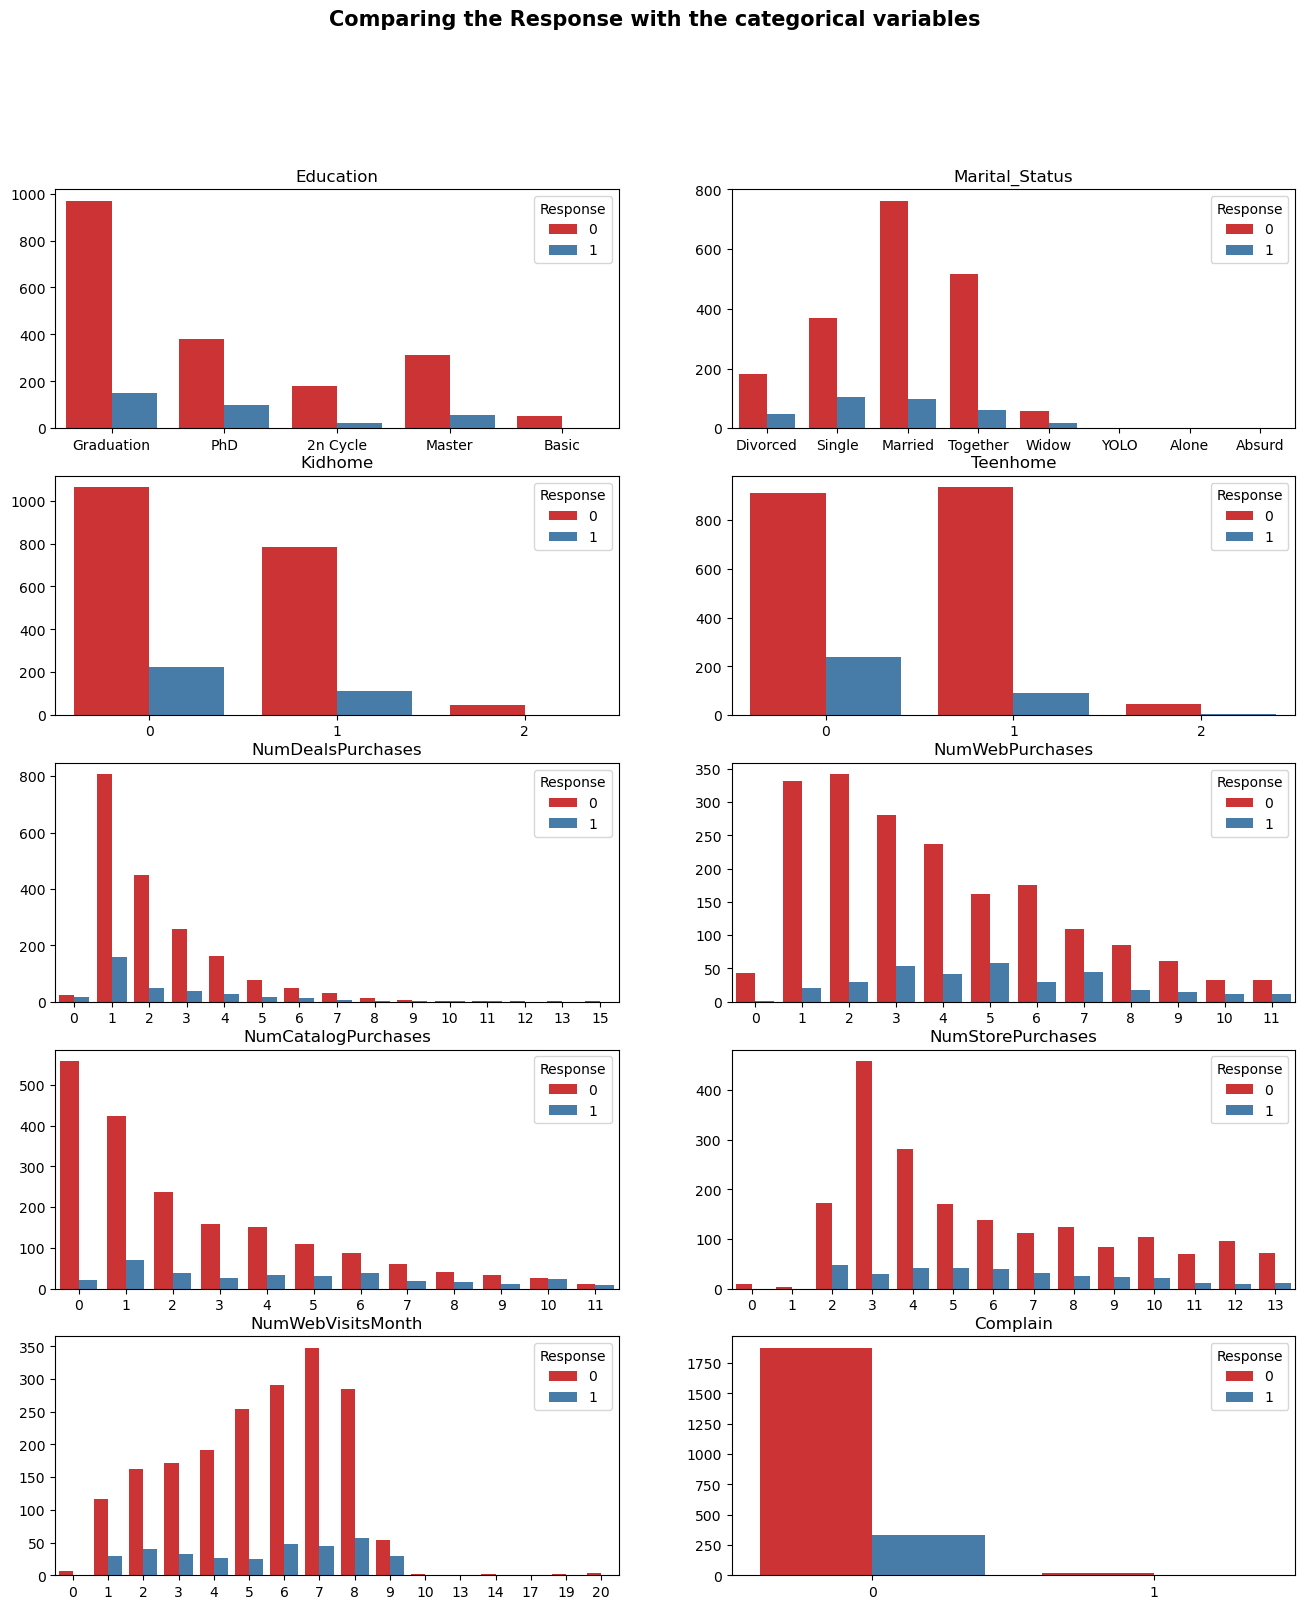

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(16, 18))
plt.suptitle("Comparing the Response with the categorical variables",fontweight="bold", fontsize=15)

cont = 0
for i in range(5):
    for j in range(2):
        sns.countplot(df, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette='Set1')
        
        ax[i][j].set_title(categorical_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()

__Insight__: 
When examining the Response in relation to categorical variables, it becomes evident that a higher number of purchases—whether through the catalog, in-store, or online—correlates with an elevated percentage of customers responding positively to the campaign.

In [30]:
continuous_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

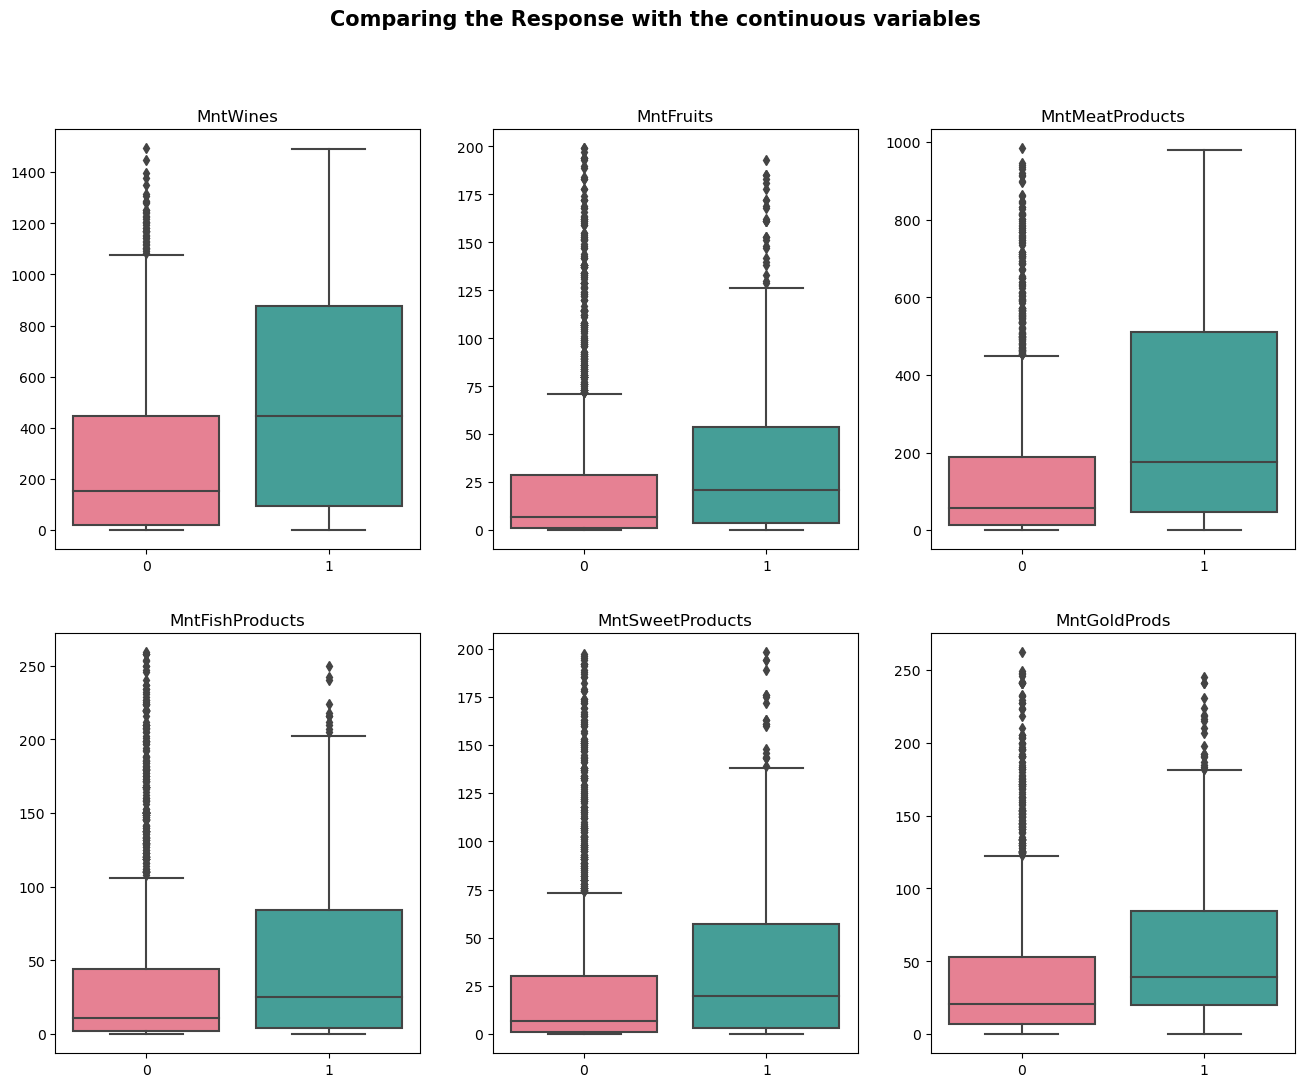

In [31]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 12))
plt.suptitle("Comparing the Response with the continuous variables",fontweight="bold", fontsize=15)
cont = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='husl')
        
        ax[i][j].set_title(continuous_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()

__Insight__: 
As customers purchase more of these products, the likelihood of their responding positively to the campaign increases the percentage of people campaign in last 2 years.

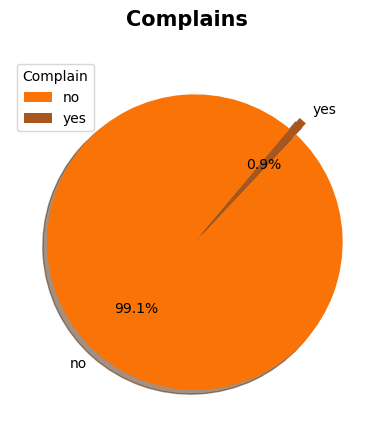

In [32]:
#Checking the distribution of complains using pie chart
plt.pie(df['Complain'].value_counts(),labels=['no','yes'],autopct='%1.1f%%',shadow=True, startangle=50,explode=(0, 0.1),colors = ['#F97306','#A9561E','#A0522D','#E50000']
)
plt.suptitle("Complains",fontweight="bold", fontsize=15)
plt.legend(title = "Complain")

plt.show()

__Insight__: The percentage of people responded to marketing campaign in last 2 year.

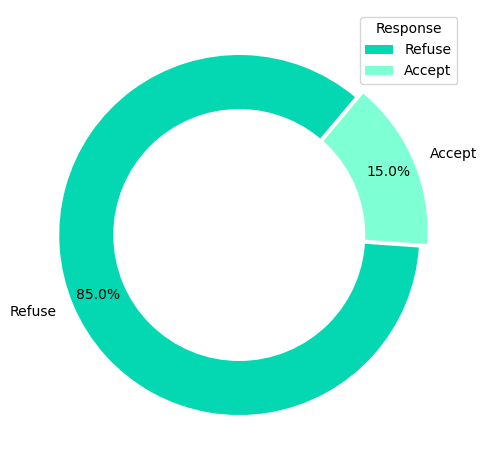

In [33]:
#Distribution of Responses

colors = ['#04D8B2','#7FFFD4','#99ff99','#ffcc99']
#explsion
explode = (0.00,0.05)
labels = ['Refuse','Accept']
plt.pie(df['Response'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', startangle=50, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(title = "Response")

plt.tight_layout()
plt.show()

Insight: The percentage of people responded to marketing campaign in last 2 year.

<Axes: xlabel='Recency', ylabel='Count'>

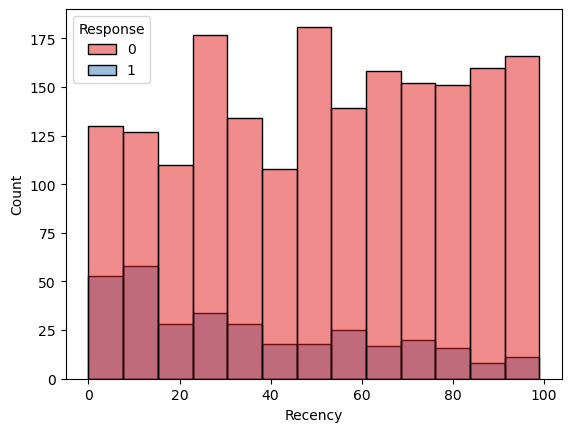

In [34]:
#Checking the recency of the responses
sns.histplot(x = 'Recency', hue = 'Response', palette = 'Set1', data = df)

__Insight__: The Recency decreases while the Response increases.

In [35]:
#Introducing another column for Age

df['Age']=2023-df['Year_Birth']

In [36]:
df[df.Age>80].Age.values

array([82, 83], dtype=int64)

<Axes: xlabel='Age', ylabel='Count'>

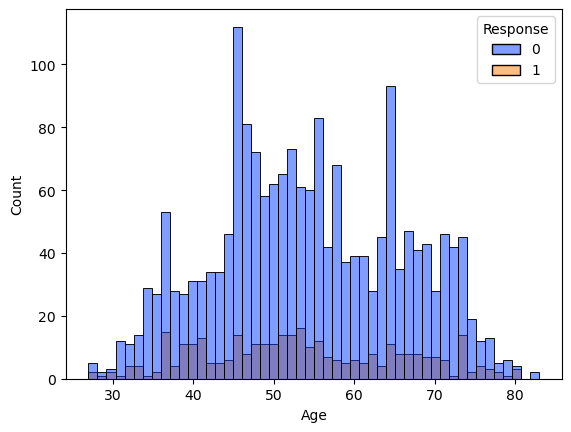

In [37]:
#Let's find out what is the age range of people those who respond to the marketing campaign?

sns.histplot(x = 'Age', hue = 'Response', palette = 'bright',bins=50, data = df)

__Insight__: The age range of people those who respond to the marketing campaign are from 44 to 48 year of age group.

<Axes: xlabel='Response', ylabel='Age'>

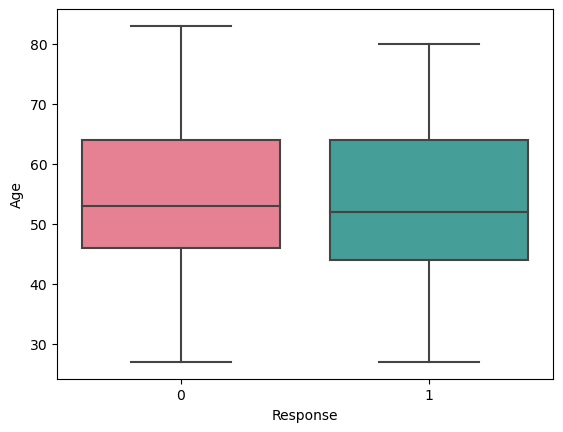

In [38]:
#Creating age range response boxplot

sns.boxplot(y = 'Age',
            x = 'Response',
            palette = "husl",data = df)

## Preprocessing/Data Cleaning

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
#Converting categorical variables into a numerical format
Education_le = LabelEncoder()
Marital_Status_le =LabelEncoder()

In [41]:
#Converting the date column into numerical format

sorted_dt = sorted([str(val) for val in df.Dt_Customer.unique()])

df['Dt_Customer'] = df.Dt_Customer.apply(lambda val: sorted_dt.index(str(val)))

In [42]:
#Dropping 'Id' column for better visualization
df.drop('Id', axis=1, inplace=True)

C:\Users\SIMRAN TALWAR\AppData\Local\Temp\ipykernel_1158208\3867428153.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, cmap='crest',  annot = True)


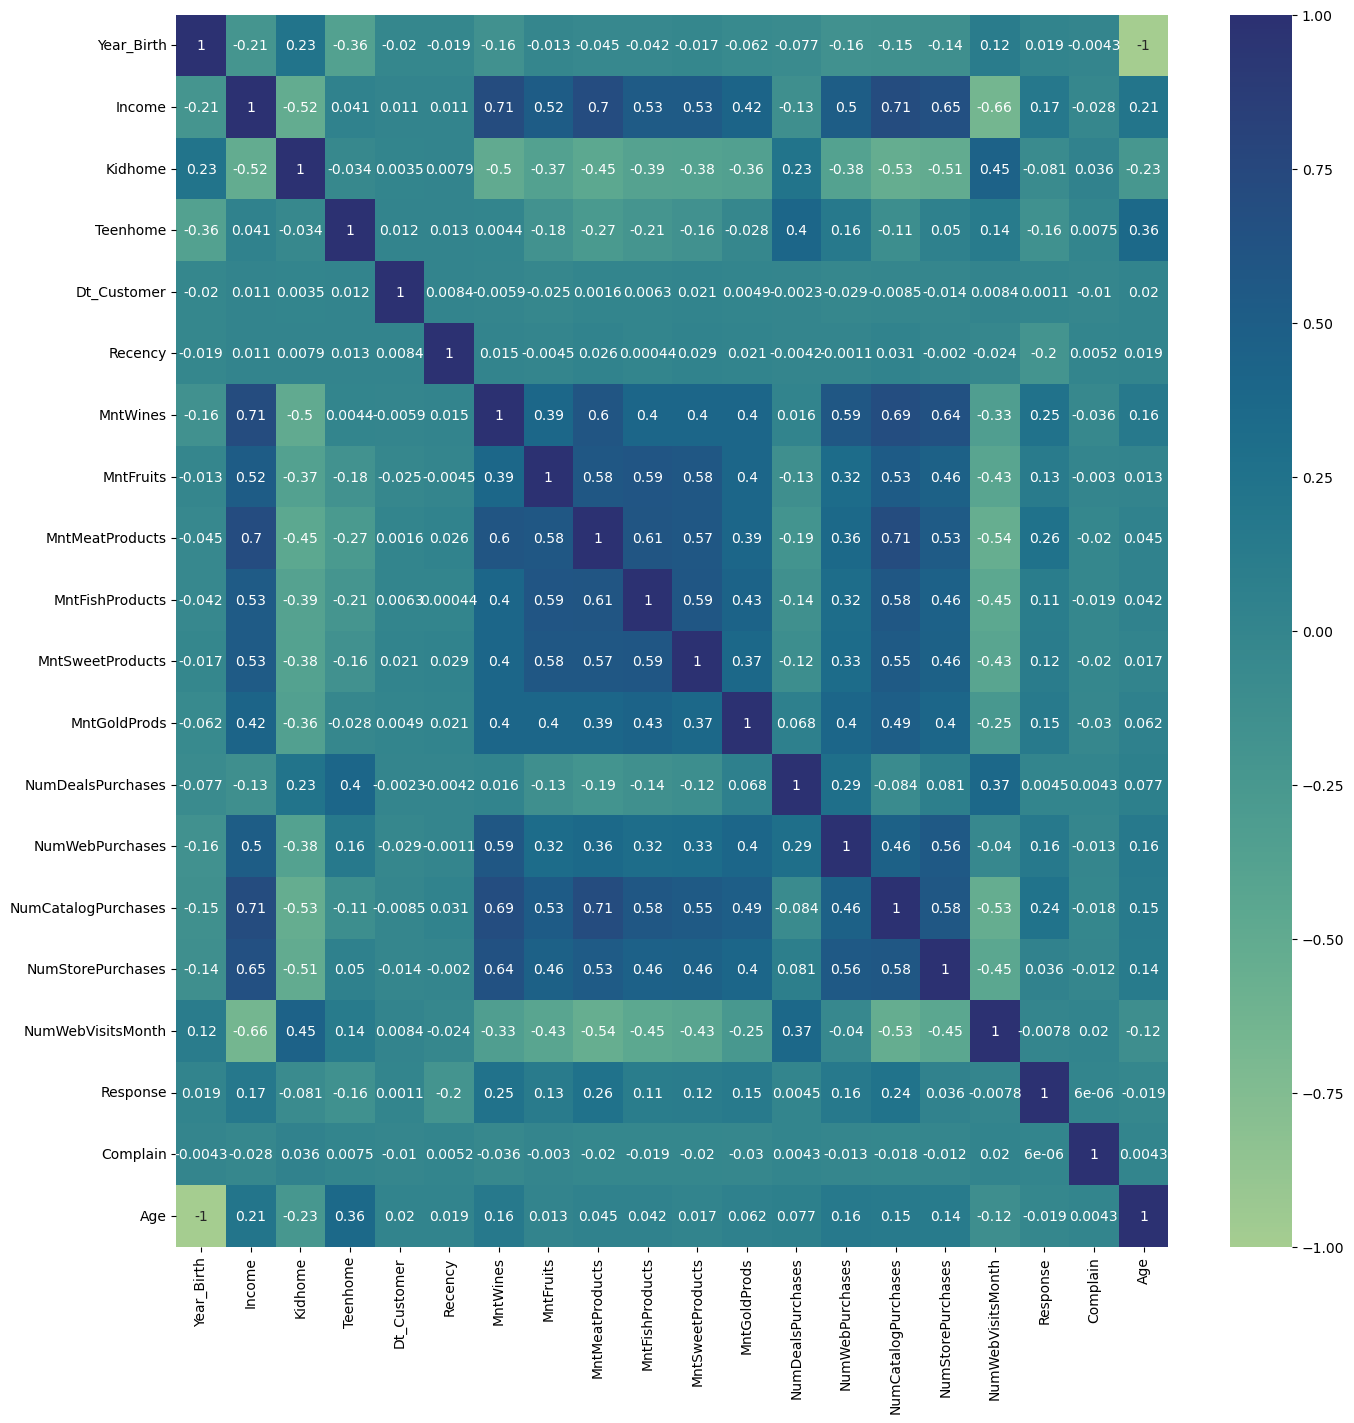

In [43]:
fig, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(df.corr(), ax=ax, cmap='crest',  annot = True)

plt.show()

### Now, we need to:

#### 1. Standardize the data

#### 2. Balance the data

#### 3. Split the data into training and testing sets

In [44]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler #used for handling imbalanced datasets through oversampling
from sklearn.model_selection import train_test_split

__Note__: Dropping the 'Response' column as it is a standard step in preparing data for supervised learning, where we want to isolate the features and the target variable for training and prediction purposes, respectively.

In [45]:
X = df.drop('Response', axis=1) #selecting all the features or independent variables
y = df.Response #selecting the target variable or dependent variable. This is what the model will try to predict

X.shape, y.shape

((2227, 21), (2227,))

In [46]:
#Converting categorical variables into dummy/indicator variables using one-hot encoding
df = pd.get_dummies(df)

In [47]:
df.dtypes

Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Dt_Customer                  int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
Response                     int64
Complain                     int64
Age                          int64
Education_2n Cycle           uint8
Education_Basic              uint8
Education_Graduation         uint8
Education_Master             uint8
Education_PhD                uint8
Marital_Status_Absurd        uint8
Marital_Status_Alone         uint8
Marital_Status_Divorced      uint8
Marital_Status_Marri

In [48]:
# Assuming X contains your features (excluding the target variable 'Response')
# Identify categorical columns
categorical_columns = ['Education','Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']
# Print DataFrame columns before any changes
print("Columns before preprocessing:", X.columns)

# Perform one-hot encoding for categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # drop_first=True to avoid the dummy variable trap

# Print DataFrame columns after one-hot encoding
print("Columns after one-hot encoding:", X.columns)

# Scale numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.select_dtypes(['int64']).columns] = scaler.fit_transform(X.select_dtypes(['int64']))

Columns before preprocessing: Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age'],
      dtype='object')
Columns after one-hot encoding: Index(['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Age', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Kidhome_1', 'Kidhome_2',
       'Teenhome_1', 'Teenhome_2', 'NumDealsPurchases_1',
 

In [49]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((3786, 91), (3786,))

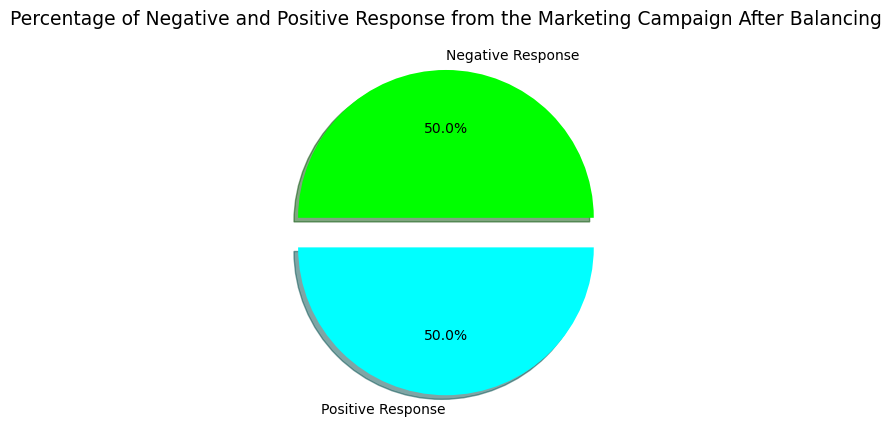

In [50]:
fig, ax = plt.subplots()

ax.pie(
    y_resampled.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#00FF00', '#00FFFF']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign After Balancing', fontsize=13.5)

plt.show()

Now, our dataset is balanced, we can split the data into training and testing sets.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    stratify=y_resampled, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3028, 91), (758, 91), (3028,), (758,))

In [52]:
y_train.value_counts()

0    1514
1    1514
Name: Response, dtype: int64

## Modelling and Evaluation

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [55]:
models_evaluation = pd.DataFrame({
    'Model': [], 
    'Precision': [],
    'Recall': [],
    'Accuracy': [],
    'F1_Score': []
})

In [56]:
#This function, concat_evaluations, takes three parameters: df, y_pred, and model. It is designed for evaluating and concatenating the evaluation metrics (precision, recall, and accuracy) to an existing DataFrame.

def concat_evaluations(df, y_pred, model):
    new_model = pd.DataFrame({
        'Model': [model],
        'Precision': [precision_score(y_pred=y_pred, y_true=y_test)],
        'Recall': [recall_score(y_pred=y_pred, y_true=y_test)],
        'Accuracy': [accuracy_score(y_pred=y_pred, y_true=y_test)],
        'F1_Score': [f1_score(y_pred=y_pred, y_true=y_test)]
    })
    
    models_evaluation = pd.concat([df, new_model], axis=0, ignore_index=True)
    
    return models_evaluation

### Applying Decision Tree Model

In [57]:
tree_params = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'min_samples_split': [2, 3, 5]
}

In [91]:
clf_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=tree_params,
    scoring='accuracy',
    cv=kf
)

clf_tree.fit(X_train, y_train)

print(f"Best hyperparams of DecissionTree: \n{clf_tree.best_params_}")

Best hyperparams of DecissionTree: 
{'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}


In [59]:
scores_tree = cross_val_score(clf_tree, X_train, y_train, cv=kf, scoring='accuracy')

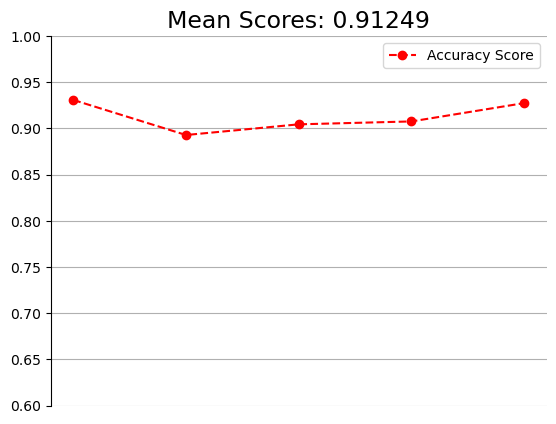

In [60]:
fig, ax = plt.subplots()

ax.plot(scores_tree, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_tree):.5f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [61]:
y_pred_tree = clf_tree.predict(X_test)

In [62]:
cm_tree = confusion_matrix(y_pred=y_pred_tree, y_true=y_test)

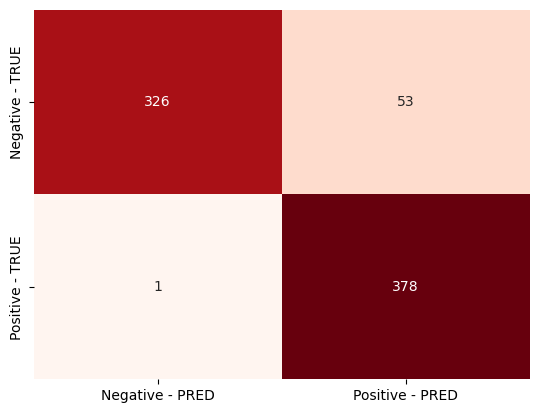

In [63]:
fig, ax = plt.subplots()

sns.heatmap(cm_tree, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])

plt.show()

In [64]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_tree, 'DecisionTree')

### Applying Random Forest Model

In [65]:
rf_params = {
    "n_estimators": [70, 90, 110],
    "criterion": ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5]
}

In [66]:
clf_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_params,
    scoring='accuracy',
    cv=kf
)

clf_rf.fit(X_train, y_train)
print(f"Best hyperparameters of RandomForest: \n{clf_rf.best_params_}")

Best hyperparameters of RandomForest: 
{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 110}


In [67]:
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=kf, scoring='accuracy')

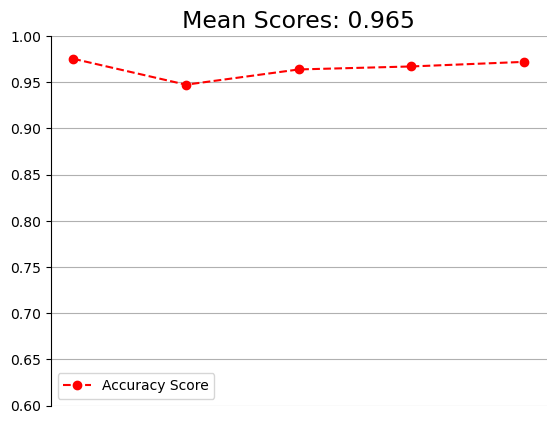

In [68]:
fig, ax = plt.subplots()

ax.plot(scores_rf, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_rf):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [69]:
 y_pred_rf = clf_rf.predict(X_test)

In [70]:
cm_rf = confusion_matrix(y_pred=y_pred_rf, y_true=y_test)

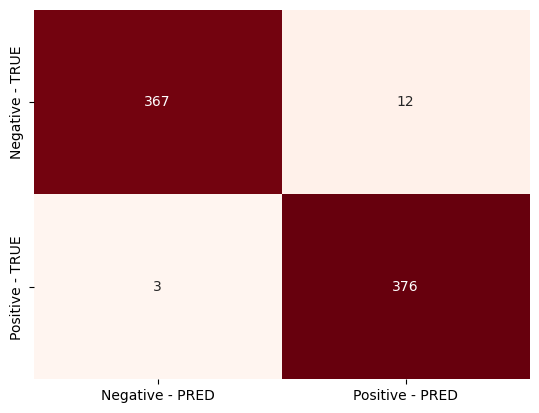

In [71]:
fig, ax = plt.subplots()

sns.heatmap(cm_rf, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])

plt.show()

In [72]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_rf, 'RandomForest')

### Applying KNN Model

In [73]:
knn_params = {
    "n_neighbors": [3, 5, 10],
    "weights": ['uniform', 'distance']
}

In [74]:
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=kf
)

clf_knn.fit(X_train, y_train)

print(f"Best hyperparams of KNN: \n{clf_knn.best_params_}")

Best hyperparams of KNN: 
{'n_neighbors': 3, 'weights': 'distance'}


In [75]:
scores_knn = cross_val_score(clf_knn, X_train, y_train, cv=kf, scoring='accuracy')

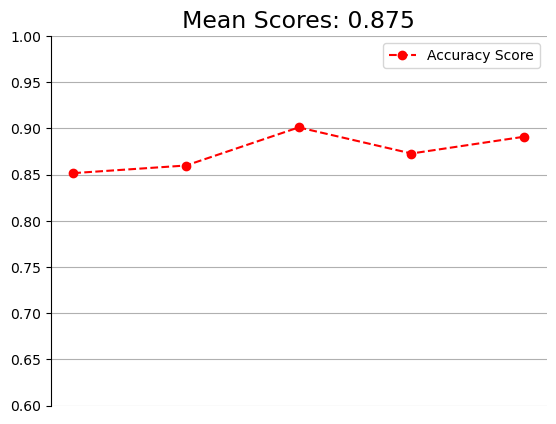

In [76]:
fig, ax = plt.subplots()

ax.plot(scores_knn, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_knn):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [77]:
y_pred_knn = clf_knn.predict(X_test)

In [78]:
cm_knn = confusion_matrix(y_pred=y_pred_knn, y_true=y_test)

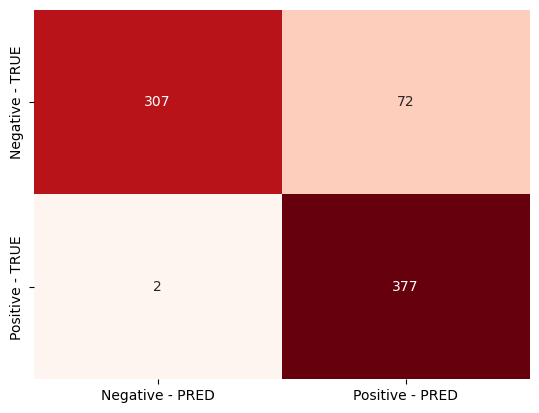

In [79]:
fig, ax = plt.subplots()

sns.heatmap(cm_knn, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])

plt.show()

In [80]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_knn, 'KNN')

### Applying SVM Model

In [81]:
svc_params = {
    "C": [0.01, 0.1, 1, 10],
    "gamma": ['scale', 'auto']
}

In [82]:
clf_svc = GridSearchCV(
    estimator=SVC(),
    param_grid=svc_params,
    scoring='accuracy',
    cv=kf
)

clf_svc.fit(X_train, y_train)

print(f"Best hyperparams of SVC: \n{clf_svc.best_params_}")

Best hyperparams of SVC: 
{'C': 10, 'gamma': 'auto'}


In [83]:
scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=kf, scoring='accuracy')

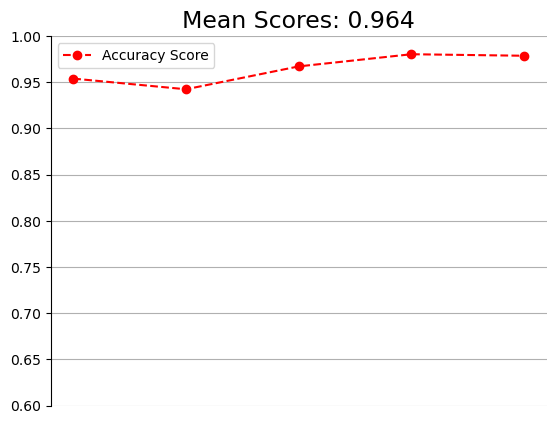

In [84]:
fig, ax = plt.subplots()

ax.plot(scores_svc, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_svc):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [85]:
y_pred_svc = clf_svc.predict(X_test)

In [86]:
cm_svc = confusion_matrix(y_pred=y_pred_svc, y_true=y_test)

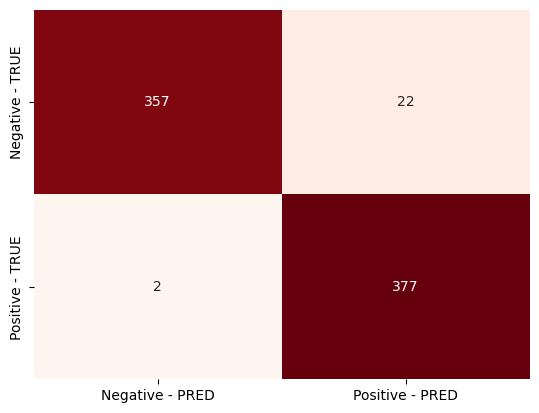

In [87]:
fig, ax = plt.subplots()

sns.heatmap(cm_svc, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])

plt.show()

In [88]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_svc, 'SVC')

In [89]:
models_evaluation.sort_values(by='Accuracy', ascending=False)

,Model,Precision,Recall,Accuracy,F1_Score
1,RandomForest,0.969072,0.992084,0.980211,0.980443
3,SVC,0.944862,0.994723,0.968338,0.969152
0,DecisionTree,0.877030,0.997361,0.928760,0.933333
2,KNN,0.839644,0.994723,0.902375,0.910628


### Key driving features for Random Forest model

Top 10 features:
Recency: 0.08925923065696592
MntWines: 0.07886098802484333
MntMeatProducts: 0.07479185771545335
Income: 0.0731751478498394
MntGoldProds: 0.06758910396213394
Dt_Customer: 0.0477969668643172
MntFruits: 0.044282765452839226
MntFishProducts: 0.043109895282767215
MntSweetProducts: 0.042259508789938775
Age: 0.04135126299669759


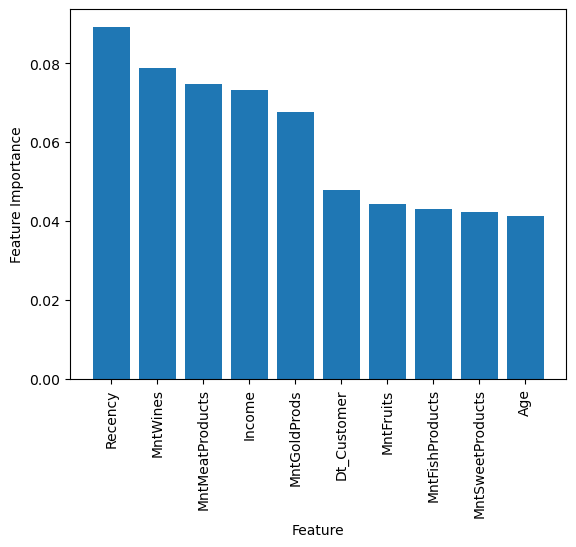

In [90]:
# Train the RandomForest model with the best hyperparameters
best_rf_model = RandomForestClassifier(criterion='entropy', min_samples_split=5, n_estimators=110)
best_rf_model.fit(X_train, y_train)

# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the top 10 feature importances
print("Top 10 features:")
for f in range(10):
    print(f"{X_train.columns[indices[f]]}: {feature_importances[indices[f]]}")

# Plot the top 10 sorted feature importances
plt.bar(range(10), feature_importances[indices[:10]])
plt.xticks(range(10), X_train.columns[indices[:10]], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

## Summary and Conclusion

##### __Summary__:

__RandomForest__:
1. Precision: 0.969072 (measures accuracy of positive predictions)
2. Recall: 0.992084 (measures the ability to capture relevant instances)
3. Accuracy: 0.980211 (overall correctness)
4. F1 Score: 0.980443 (balances precision and recall)

__SVC__:
1. Precision: 0.944862 (measures accuracy of positive predictions)
2. Recall: 0.994723 (measures the ability to capture relevant instances)
3. Accuracy: 0.968338 (overall correctness)
4. F1 Score: 0.969152 (balances precision and recall)

__DecisionTree__:
1. Precision: 0.877030 (measures accuracy of positive predictions)
2. Recall: 0.997361 (measures the ability to capture relevant instances)
3. Accuracy: 0.928760 (overall correctness)
4. F1 Score: 0.933333 (balances precision and recall)

__KNN__:

1. Precision: 0.839644 (measures accuracy of positive predictions)
2. Recall: 0.994723 (measures the ability to capture relevant instances)
3. Accuracy: 0.902375 (overall correctness)
4. F1 Score: 0.910628 (balances precision and recall)

#### Conclusion

__RandomForest__ (Model 1):
Achieves high precision (96.91%) and recall (99.21%), indicating accurate positive predictions and effective capturing of relevant instances.
High overall accuracy (98.02%) and a balanced F1 Score (98.04%) make it a strong performer across various evaluation metrics.

__SVC__ (Model 3):
Demonstrates high precision (94.49%) and recall (99.47%), indicating accurate positive predictions and effective capturing of relevant instances.
The overall accuracy (96.83%) and F1 Score (96.92%) suggest strong overall performance, though slightly lower than RandomForest.

__DecisionTree__ (Model 0):
Shows good precision (87.70%) and exceptionally high recall (99.74%), making it effective at capturing relevant instances.
The overall accuracy (92.88%) is solid, and the balanced F1 Score (93.33%) reflects a good compromise between precision and recall.

__KNN__(Model 2):
Presents reasonable precision (83.96%) and high recall (99.47%), showcasing accuracy in positive predictions and capturing relevant instances.
The overall accuracy (90.24%) and F1 Score (91.06%) indicate a commendable performance, although slightly below RandomForest.

## Use for other Domains

__Random Forest__:

1. Feature Selection: Identify domain-specific features that are relevant to the new problem. Add or remove features based on their importance in the new context.
2. Hyperparameter Tuning: Tune the hyperparameters of the Random Forest model according to the characteristics of the new data. This might involve adjusting the number of trees, the depth of the trees, and other parameters.
3. Domain – Specific Evaluation Metrics:  Choose evaluation metrics that are appropriate for the specific domain. For example, in healthcare, you might focus on sensitivity and specificity.
4. Interpretability: Consider the interpretability of the Random Forest model. In some domains, interpretability might be crucial for gaining trust in the model's predictions.

__K-Nearest Neighbors (KNN)__:

1. Feature Scaling: Depending on the new domain, you might need to scale the features differently. Some domains might require standardization or normalization of features.
2. Number of Neighbors: Experiment with the number of neighbors in the KNN algorithm. The optimal number may vary depending on the characteristics of the new data.
3. Feature Engineering: Adjust the distance metric used in the KNN algorithm based on the nature of the data. Different distance metrics may be more suitable for different types of features.
4. Distance Metric: Adjust the distance metric used in the KNN algorithm based on the nature of the data. Different distance metrics may be more suitable for different types of features.

__Support Vector Machine (SVM)__:

1. Kernel Selection: Choose an appropriate kernel for the SVM based on the nature of the new data. Linear, polynomial, and radial basis function (RBF) kernels have different implications for different types of data.
2. Feature Scaling: SVM is sensitive to the scale of features. Ensure that features are scaled appropriately, especially in domains where the scale of variables may differ significantly.
3. C and Gamma Parameters: Tune the regularization parameter (C) and kernel coefficient (gamma) to optimize the SVM model for the new data.

__Decision Tree__:

1. Depth of the Tree: Adjust the maximum depth of the decision tree based on the complexity of the new problem. A more complex problem may require deeper trees.
2. Pruning: Consider pruning the decision tree to prevent overfitting. Pruning becomes essential when dealing with noisy or complex data.
3. Feature Importance: Examine the feature importance provided by the decision tree. This can offer insights into the variables that contribute most to the predictions in the new domain.
4. Interpretability: Decision trees are inherently interpretable. Leverage this aspect, especially in domains where interpretability is crucial.